In [56]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/content/dataset_final_project.csv')

# Change the Value
df['Branch'] = df['Branch'].replace({'A': 1, 'B': 2, 'C': 3})
df['City'] = df['City'].replace({'Yangon': 1, 'Naypyitaw': 2, 'Mandalay': 3})
df['Customer type'] = df['Customer type'].replace({'Normal': 1, 'Member': 2})
df['Product line'] = df['Product line'].replace(
    {'Electronic accessories': 1, 'Fashion accessories': 2, 'Food and beverages': 3,
     'Health and beauty': 4, 'Home and lifestyle':5, 'Sports and travel': 6})
df['Payment'] = df['Payment'].replace({'Cash': 1, 'Credit card': 2, 'Ewallet': 3})

# add calculations columns
df['Total'] = df['Quantity'] * df['Unit price']
df['Tax 5%'] = df['Total'] * 0.05
df['Final price'] = df['Total'] - df['Tax 5%']

# make sure no NaN
df = df.dropna()
# To display the first few rows of the dataframe
print(df.head())



    Invoice ID  Branch  City  Customer type  Gender  Product line  Unit price  \
0  750-67-8428       1     1              2  Female             4       74.69   
1  226-31-3081       3     2              1  Female             1       15.28   
2  631-41-3108       1     1              1    Male             5       46.33   
3  123-19-1176       1     1              2    Male             4       58.22   
4  373-73-7910       1     1              1    Male             6       86.31   

   Quantity       Date   Time  Payment  Rating   Total   Tax 5%  Final price  
0         7   1/5/2019  13:08        3     9.1  522.83  26.1415     496.6885  
1         5   3/8/2019  10:29        1     9.6   76.40   3.8200      72.5800  
2         7   3/3/2019  13:23        2     7.4  324.31  16.2155     308.0945  
3         8  1/27/2019  20:33        3     8.4  465.76  23.2880     442.4720  
4         7   2/8/2019  10:37        3     5.3  604.17  30.2085     573.9615  


<Axes: xlabel='Product line'>

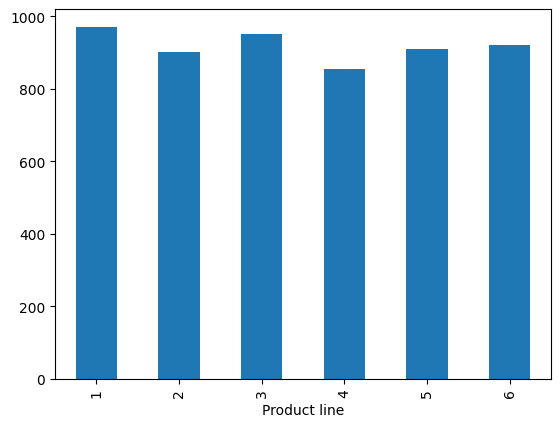

In [57]:

# make bar chart Quantity vs Product line
grouped = df.groupby('Product line')   # Step 1: Group by 'Product line'
quantities = grouped['Quantity']       # Step 2: Select 'Quantity' column
total_quantities = quantities.sum()    # Step 3: Sum 'Quantity' for each group
total_quantities.plot(kind='bar')      # Step 4: Plot as bar chart


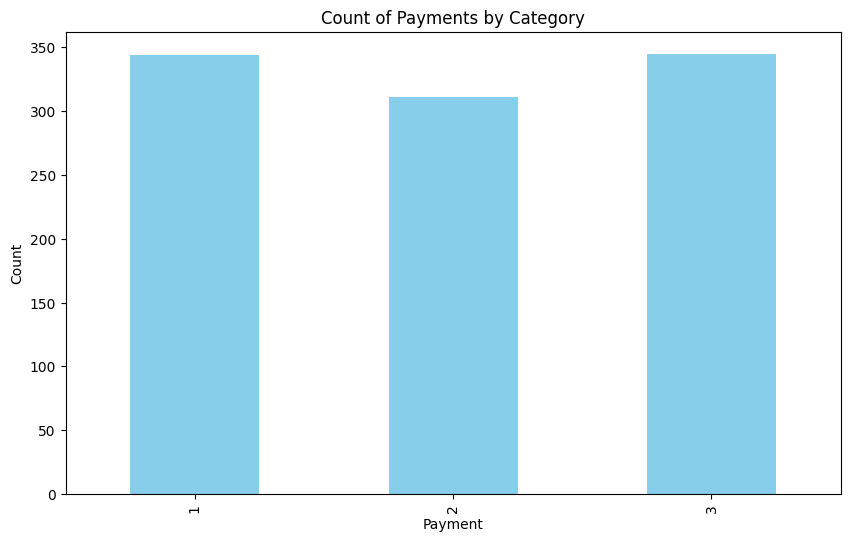

In [58]:
import matplotlib.pyplot as plt

# Step 1: Filter and group the data, then count occurrences of each payment method
payment_count = df.groupby('Payment').size()

# Step 2: Plot using matplotlib
plt.figure(figsize=(10,6))  # Set figure size
payment_count.plot(kind='bar', color='skyblue')
plt.title('Count of Payments by Category')  # Set title
plt.xlabel('Payment')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.show()  # Display the plot


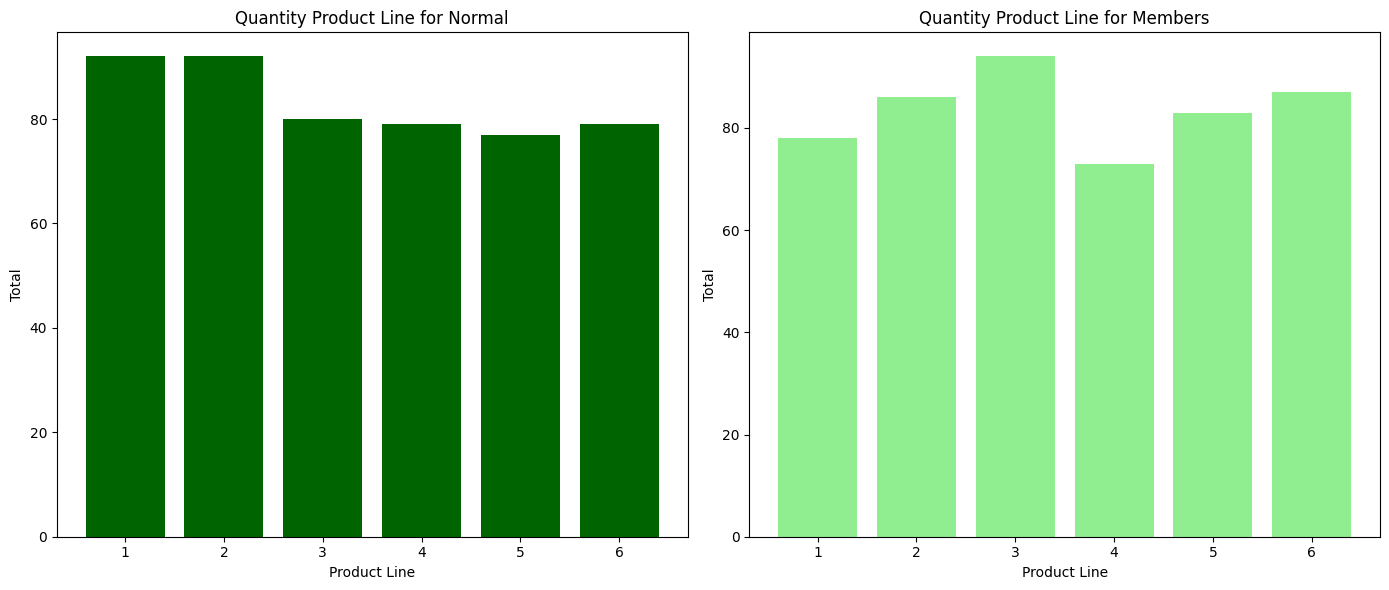

In [59]:
import matplotlib.pyplot as plt

# Create a figure and two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 row, 2 columns of subplots

# Step 1: Plot for 'Normal' customers (Customer type = 1)
total_normal_quantities = df[df['Customer type'] == 1].groupby('Product line').size()
axes[0].bar(total_normal_quantities.index, total_normal_quantities.values, color='darkgreen')
axes[0].set_title('Quantity Product Line for Normal')  # Set title
axes[0].set_xlabel('Product Line')  # Set x-axis label
axes[0].set_ylabel('Total')  # Set y-axis label

# Step 2: Plot for 'Member' customers (Customer type = 2)
total_member_quantities = df[df['Customer type'] == 2].groupby('Product line').size()
axes[1].bar(total_member_quantities.index, total_member_quantities.values, color='lightgreen')
axes[1].set_title('Quantity Product Line for Members')  # Set title
axes[1].set_xlabel('Product Line')  # Set x-axis label
axes[1].set_ylabel('Total')  # Set y-axis label

# Adjust layout
plt.tight_layout()

# Display both plots
plt.show()


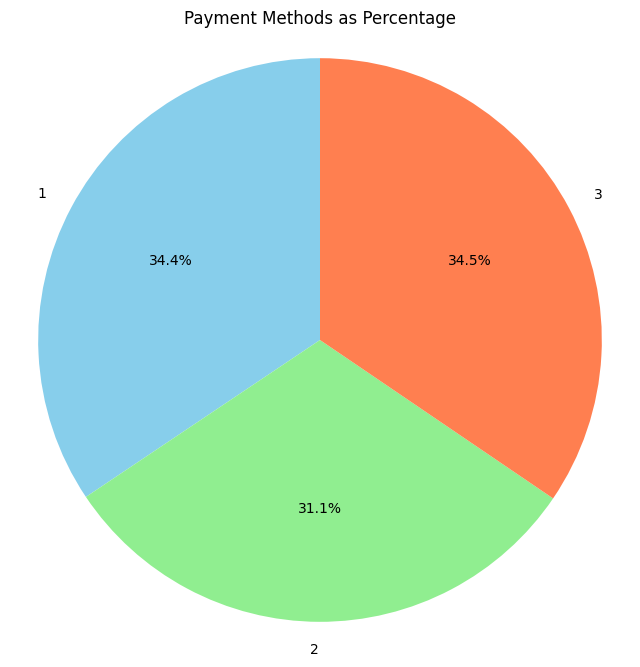

In [60]:
import matplotlib.pyplot as plt

# Step 1: Filter and group the data, then count occurrences of each payment method
payment_count = df.groupby('Payment').size()

# Step 2: Convert the counts into percentages
payment_percentage = (payment_count / payment_count.sum()) * 100

# Step 3: Plot the pie chart using matplotlib
plt.figure(figsize=(8,8))  # Set figure size
plt.pie(payment_percentage, labels=payment_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral'], startangle=90)

# Step 4: Set the title and display the pie chart
plt.title('Payment Methods as Percentage')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


<Axes: title={'center': 'Each Product Total Final Price'}, xlabel='Product Line', ylabel='Total Final Price'>

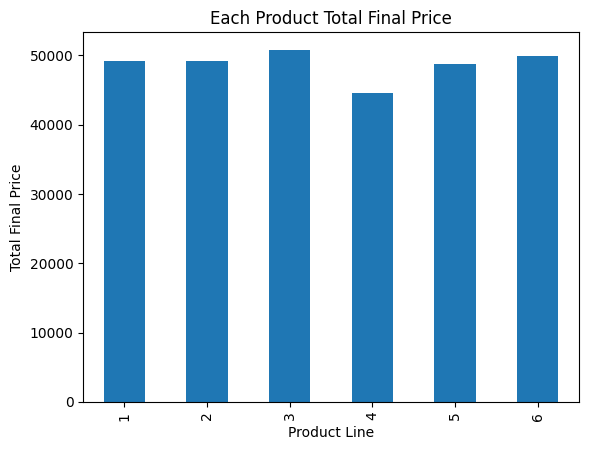

In [61]:
df.groupby('Product line')['Final price'].sum().plot(kind='bar', title='Each Product Total Final Price', xlabel='Product Line', ylabel='Total Final Price')